# Viculación: Segmentación de Estudiantes

 ## Names: Edgar Munoz Abad 

## Carga de datos y librerias

In [1]:
 ## Carga de datos: Luego de ordenar los datos en un solo archivo se procede 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#import ace_tools as tools

In [2]:
path='data.xlsx'
df = pd.read_excel(path)


In [3]:
# mostrar la data
df.head()

,Institucion,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
0,MANUELA CAÑISARES MATRIZ,2.250537e+09,MACIAS CAMPOVERDE YARELY FERNANDA,2019-07-02,SI,INTELECTUAL,0.36,INICIAL 2
1,MANUELA CAÑISARES MATRIZ,2.250537e+09,MACIAS CAMPOVERDE JANA VALENTINA,2019-07-02,SI,INTELECTUAL,0.36,INICIAL 2
2,MANUELA CAÑISARES MATRIZ,2.250538e+09,TAPUY GREFA ALEJANDRO ISAAC,2019-07-11,NO,NaN,NaN,INICIAL 2
3,MANUELA CAÑISARES MATRIZ,2.250466e+09,GOYES VILLALTA LUIS AARON,2017-12-05,SI,INTELECTUAL,0.36,1RO EGB
4,MANUELA CAÑISARES MATRIZ,1.352713e+09,SANCHEZ OLMEDO ALEXANDRA GUADALUPE,2017-10-06,SI,FISICA,0.85,1RO EGB


## Procesamiento

En esta seccion se procesara la data de cada una de las columnas. Al tener poca data no es faltible eliminar la data, si no q se aplicara tecnicas para autorellenar los valores faltante

### Transformacion de variables

In [4]:
df['TIPOD'].unique()

array(['INTELECTUAL', nan, 'FISICA', 'PSICOSOCIAL', 'VISUAL ',
       'AUDITIVA ', 'INTELECTUAL ', 'VISUAL', 'intelectual', 'visual',
       'Autismo'], dtype=object)

In [5]:

df.isnull().sum()

Institucion                           0
CEDULA ESTUDIANTE                    13
APELLIDOS Y NOMBRES                   0
FECHA DE NACIMIENTO \nDÍA-MES-AÑO    32
TIENE CARNE \nSI/NO                  28
TIPOD                                14
PORCENTAJE\n%                        23
GRADO O CURSO\n2023 2024              3
dtype: int64

In [6]:

#Esatndarizar solo en mayusculas
df['TIPOD'] = df['TIPOD'].str.upper()
# borrar espacio al inicio o final
df['TIPOD'] = df['TIPOD'].apply(lambda x: str(x).strip() if isinstance(x, str) else x)
df['APELLIDOS Y NOMBRES'] = df['APELLIDOS Y NOMBRES'].apply(lambda x: str(x).strip() if isinstance(x, str) else x)
#df['TIPOD'].unique()

In [7]:
df['TIPOD'].unique()

array(['INTELECTUAL', nan, 'FISICA', 'PSICOSOCIAL', 'VISUAL', 'AUDITIVA',
       'AUTISMO'], dtype=object)

### Procesar Nulos

In [8]:

df.isnull().sum()


Institucion                           0
CEDULA ESTUDIANTE                    13
APELLIDOS Y NOMBRES                   0
FECHA DE NACIMIENTO \nDÍA-MES-AÑO    32
TIENE CARNE \nSI/NO                  28
TIPOD                                14
PORCENTAJE\n%                        23
GRADO O CURSO\n2023 2024              3
dtype: int64

#### Nulos: Tiene Carnet, Tiene discapacidad, porcentaje, CEDULA

Se rellenara a las filas que tienen las 3 columnas nulas con la siguiente informacion: Tiene Carnet=NO, TipoD=NINGUNA, Porcentaje=0

In [9]:
#MOSTRAR LAS COLUMNAS DE 3 NULOS
df.loc[(df.loc[:, "TIENE CARNE \nSI/NO"].isnull()) & (df.loc[:, "TIPOD"].isnull()) & (df.loc[:, "PORCENTAJE\n%"].isnull())]

,Institucion,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
6,MANUELA CAÑISARES MATRIZ,2.150546e+09,NAANCH TSENKUSH PAUL JON,NaT,NaN,NaN,NaN,1RO EGB
19,MANUELA CAÑISARES MATRIZ,2.250347e+09,ANDY SHIGUANGO NEYMAR ANGEL,NaT,NaN,NaN,NaN,4TO EGB
26,MANUELA CAÑISARES MATRIZ,2.250415e+09,QUEZADA ALARCON BRITHANY JOHANNA,NaT,NaN,NaN,NaN,NaN
38,MANUELA CAÑISARES MATRIZ,1.101205e+09,VASQUEZ ARDILA JONATHAN,NaT,NaN,NaN,NaN,5TO EGB
39,MANUELA CAÑISARES MATRIZ,2.250341e+09,TENEZACA REMACHE JENNIFER ADRIANA,NaT,NaN,NaN,NaN,5TO EGB
45,MANUELA CAÑISARES MATRIZ,2.200680e+09,MORA AGUINDA FLOR MARINA,NaT,NaN,NaN,NaN,6TO EGB
46,MANUELA CAÑISARES MATRIZ,2.200661e+09,GUALLCO TIPAN BRIGITH SAURI,NaT,NaN,NaN,NaN,6TO EGB
143,MANUELA CAÑISARES MATRIZ,2.200277e+09,QUIÑONEZ GREFA KEVIN JOEL,NaT,NaN,NaN,NaN,3ERO BACHILLERATO


In [10]:
# COLOCAR VALORES RESPECTIVOS PARA LOS 3 VALORES NULOS EN COMBINACION
def replace_values(row):
    if pd.isnull(row['TIENE CARNE \nSI/NO']) and  pd.isnull(row['TIPOD']) and  pd.isnull(row['PORCENTAJE\n%']):
        row['TIENE CARNE \nSI/NO'] = 'NO'
        row['TIPOD'] = 'NINGUNA'
        row['PORCENTAJE\n%'] = 0
    return row
df = df.apply(replace_values, axis=1)    

In [11]:
df.loc[(df.loc[:, "TIENE CARNE \nSI/NO"]=='NO') & (df.loc[:, "TIPOD"]=='NINGUNA') & (df.loc[:, "PORCENTAJE\n%"]==0)]

,Institucion,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
6,MANUELA CAÑISARES MATRIZ,2.150546e+09,NAANCH TSENKUSH PAUL JON,NaT,NO,NINGUNA,0,1RO EGB
19,MANUELA CAÑISARES MATRIZ,2.250347e+09,ANDY SHIGUANGO NEYMAR ANGEL,NaT,NO,NINGUNA,0,4TO EGB
26,MANUELA CAÑISARES MATRIZ,2.250415e+09,QUEZADA ALARCON BRITHANY JOHANNA,NaT,NO,NINGUNA,0,NaN
38,MANUELA CAÑISARES MATRIZ,1.101205e+09,VASQUEZ ARDILA JONATHAN,NaT,NO,NINGUNA,0,5TO EGB
39,MANUELA CAÑISARES MATRIZ,2.250341e+09,TENEZACA REMACHE JENNIFER ADRIANA,NaT,NO,NINGUNA,0,5TO EGB
45,MANUELA CAÑISARES MATRIZ,2.200680e+09,MORA AGUINDA FLOR MARINA,NaT,NO,NINGUNA,0,6TO EGB
46,MANUELA CAÑISARES MATRIZ,2.200661e+09,GUALLCO TIPAN BRIGITH SAURI,NaT,NO,NINGUNA,0,6TO EGB
143,MANUELA CAÑISARES MATRIZ,2.200277e+09,QUIÑONEZ GREFA KEVIN JOEL,NaT,NO,NINGUNA,0,3ERO BACHILLERATO


#### Nulos: Tiene discapacidad

In [12]:

df.loc[(df.loc[:, "TIPOD"].isnull())]

,Institucion,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
2,MANUELA CAÑISARES MATRIZ,2.250538e+09,TAPUY GREFA ALEJANDRO ISAAC,2019-07-11,NO,NaN,NaN,INICIAL 2
20,MANUELA CAÑISARES MATRIZ,2.250391e+09,ALVAREZ TROYA DANIEL FERNANDO,2015-09-05,NO,NaN,NaN,4TO EGB
31,MANUELA CAÑISARES MATRIZ,2.250422e+09,GARCIA GARCIA DARWIN ALEJANDRO,2012-12-09,NO,NaN,NaN,5TO EGB
47,MANUELA CAÑISARES MATRIZ,2.200661e+09,GREFA AGUINDA INTI RUMI,2012-08-22,SI,NaN,NaN,6TO EGB
49,MANUELA CAÑISARES MATRIZ,2.250138e+09,QUEZADA ZAMBRANO JOSE LUIS,2012-09-23,NO,NaN,NaN,6TO EGB
61,MANUELA CAÑISARES MATRIZ,2.250100e+09,LAPO JUELA SARAHI STEFANIA,2009-03-15,NO,NaN,NaN,8VO EGB


SE CARGA LOS VALORES EN FUNCION DE LA COLUMNA TIENE CARNE \nSI/NO

In [13]:
#RELLENAR LOS NULOS DE TIPO DE DISCAPACIDA CON NIGUNA A LOS QUE NO TIENE CARNET
df["TIPOD"] = np.where(df["TIENE CARNE \nSI/NO"]=='NO', 'NINGUNA',df["TIPOD"])

In [14]:

df.loc[(df.loc[:, "TIPOD"].isnull()) ]

,Institucion,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
47,MANUELA CAÑISARES MATRIZ,2.200661e+09,GREFA AGUINDA INTI RUMI,2012-08-22,SI,NaN,NaN,6TO EGB


Rellenamos el valor que mas se repite

In [15]:
df.dtypes



Institucion                                  object
CEDULA ESTUDIANTE                           float64
APELLIDOS Y NOMBRES                          object
FECHA DE NACIMIENTO \nDÍA-MES-AÑO    datetime64[ns]
TIENE CARNE \nSI/NO                          object
TIPOD                                        object
PORCENTAJE\n%                                object
GRADO O CURSO\n2023 2024                     object
dtype: object

In [16]:
#RELLENAR LOS VALORES NULOS CON EL VALOR Q MAS SE REPITE

df['TIPOD'] = df['TIPOD'].fillna(df['TIPOD'].mode()[0])
df.loc[(df.loc[:, "APELLIDOS Y NOMBRES"]=='GREFA AGUINDA INTI RUMI') ]

,Institucion,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
47,MANUELA CAÑISARES MATRIZ,2.200661e+09,GREFA AGUINDA INTI RUMI,2012-08-22,SI,INTELECTUAL,NaN,6TO EGB


In [17]:
df.isnull().sum()

Institucion                           0
CEDULA ESTUDIANTE                    13
APELLIDOS Y NOMBRES                   0
FECHA DE NACIMIENTO \nDÍA-MES-AÑO    32
TIENE CARNE \nSI/NO                  20
TIPOD                                 0
PORCENTAJE\n%                        15
GRADO O CURSO\n2023 2024              3
dtype: int64

In [18]:
df.loc[(df.loc[:, "TIENE CARNE \nSI/NO"].isnull())]

,Institucion,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
167,MATRIZ JORGE RODRIGEZ,2.250024e+09,ANDRADE GOMEZ ANAHI THAIS,NaT,NaN,AUDITIVA,0.31,3ERO BACHILLERATO
168,MATRIZ JORGE RODRIGEZ,2.101127e+09,RIERA TOCTAGUNO ANGELICA KATHERINE,NaT,NaN,FISICA,0.44,2DO BACHILLERATO
169,MATRIZ JORGE RODRIGEZ,2.200496e+09,RAMIREZ ATACUSHI MARIA ISABEL,NaT,NaN,FISICA,0.82,2DO BACHILLERATO
170,MATRIZ JORGE RODRIGEZ,2.101127e+09,RIERA TOCTAGUNO ANGELICA KATHERINE,NaT,NaN,INTELECTUAL,0.44,2DO BACHILLERATO
171,MATRIZ JORGE RODRIGEZ,2.200354e+09,QUEVEDO ORTIZ JARET ALEXANDER,NaT,NaN,INTELECTUAL,0.65,2DO BACHILLERATO
172,MATRIZ JORGE RODRIGEZ,2.101127e+09,RIERA TOCTAGUNO ANGELICA KATHERINE,NaT,NaN,INTELECTUAL,0.44,2DO BACHILLERATO
173,MATRIZ JORGE RODRIGEZ,2.200215e+09,VITE TIXI JEFFERSON STEVEN,NaT,NaN,INTELECTUAL,0.35,3ERO BACHILLERATO
174,MATRIZ JORGE RODRIGEZ,2.101127e+09,RIERA TOCTAGUNO ANGELICA KATHERINE,NaT,NaN,FISICA,0.44,3ERO BACHILLERATO
175,MATRIZ JORGE RODRIGEZ,2.250041e+09,GRANDEZ AGILERA JOSE FERNANDO,NaT,NaN,AUTISMO,NaN,9NO EGB
176,FRANCISCO ORELLANA,NaN,GERMY GIOMAR ORDOÑEZ BRAVO,NaT,NaN,INTELECTUAL,0.25,3ERO BACHILLERATO


### Nulos: TIENE CARNE \nSI/NO

Se llena en funcion del tipo de discapacidad. Tiene discapacidad entonces tiene carnet.

In [19]:
df["TIENE CARNE \nSI/NO"] = np.where(df["TIPOD"]!='NINGUNA', 'SI',df["TIENE CARNE \nSI/NO"])

In [20]:
df.isnull().sum()

Institucion                           0
CEDULA ESTUDIANTE                    13
APELLIDOS Y NOMBRES                   0
FECHA DE NACIMIENTO \nDÍA-MES-AÑO    32
TIENE CARNE \nSI/NO                   0
TIPOD                                 0
PORCENTAJE\n%                        15
GRADO O CURSO\n2023 2024              3
dtype: int64

### Nulos: PORCENTAJE\n%

Se rellena en funcion de tipo de discapacida: Ninguna discapacidad entonce porcentaje 0

In [21]:
df.loc[(df.loc[:, "PORCENTAJE\n%"].isnull())]

,Institucion,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
2,MANUELA CAÑISARES MATRIZ,2.250538e+09,TAPUY GREFA ALEJANDRO ISAAC,2019-07-11,NO,NINGUNA,NaN,INICIAL 2
20,MANUELA CAÑISARES MATRIZ,2.250391e+09,ALVAREZ TROYA DANIEL FERNANDO,2015-09-05,NO,NINGUNA,NaN,4TO EGB
31,MANUELA CAÑISARES MATRIZ,2.250422e+09,GARCIA GARCIA DARWIN ALEJANDRO,2012-12-09,NO,NINGUNA,NaN,5TO EGB
47,MANUELA CAÑISARES MATRIZ,2.200661e+09,GREFA AGUINDA INTI RUMI,2012-08-22,SI,INTELECTUAL,NaN,6TO EGB
49,MANUELA CAÑISARES MATRIZ,2.250138e+09,QUEZADA ZAMBRANO JOSE LUIS,2012-09-23,NO,NINGUNA,NaN,6TO EGB
61,MANUELA CAÑISARES MATRIZ,2.250100e+09,LAPO JUELA SARAHI STEFANIA,2009-03-15,NO,NINGUNA,NaN,8VO EGB
147,PRESIDENTE TAMAYO,2.351623e+09,ALLAUCA CAMPOS SOFIA PRISCILA,2018-06-23,SI,PSICOSOCIAL,NaN,1ERO EGB
148,PRESIDENTE TAMAYO,2.250514e+09,GUZMAN AGUINDA TONY JOSHUE,2018-12-15,SI,PSICOSOCIAL,NaN,1ERO EGB
149,PRESIDENTE TAMAYO,2.250334e+09,CEPEDA AGUALONGO ABIEL JHOSUA,2013-08-19,SI,PSICOSOCIAL,NaN,4TO EGB
150,PRESIDENTE TAMAYO,2.250237e+09,FARFAN MECIAS DYLAN RICARDO,2013-11-14,SI,PSICOSOCIAL,NaN,6TO EGB


In [22]:
df["PORCENTAJE\n%"] = np.where(df["TIPOD"]=='NINGUNA', 0,df["PORCENTAJE\n%"])

In [23]:
df['PORCENTAJE\n%'].unique()

array([0.36, 0, 0.85, 0.84, 0.37, 0.77, 0.75, 0.79, 0.71, 0.88, 0.52,
       0.53, 0.5, 0.4, 0.76, 0.44, 0.8, 0.38, 0.41, 0.82, 0.46, 0.73, nan,
       0.9, 0.66, 0.91, 0.57, 0.49, 0.56, 0.32, 0.78, 0.67, 0.55, 0.45,
       0.7, 0.3, 0.58, 0.43, 0.63, 0.48, 0.6, 0.72, 0.86, 0.68, 0.95,
       0.65, 0.89, 0.42, 'S/N', 0.62, 0.54, 0.61, 0.33, 0.35, 0.81, 0.31,
       0.25, 0.59], dtype=object)

In [24]:
# se localiza un caratecterar no comun
df.loc[(df.loc[:, "PORCENTAJE\n%"]=='S/N')]

,Institucion,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
115,MANUELA CAÑISARES MATRIZ,17895756.0,FORNEZ QUINTERO ANGEL GABRIEL,2007-05-30,SI,INTELECTUAL,S/N,1ERO BACHILLERATO


In [25]:
#cambaimos el S/N por NaN para rellenar la columan con el promedio
df["PORCENTAJE\n%"] = np.where(df["PORCENTAJE\n%"]=='S/N', np.nan ,df["PORCENTAJE\n%"])

In [26]:
# convertimos la variable porcentaje en nuemrico
df["PORCENTAJE\n%"] = pd.to_numeric(df["PORCENTAJE\n%"])


In [27]:

df.isnull().sum()


Institucion                           0
CEDULA ESTUDIANTE                    13
APELLIDOS Y NOMBRES                   0
FECHA DE NACIMIENTO \nDÍA-MES-AÑO    32
TIENE CARNE \nSI/NO                   0
TIPOD                                 0
PORCENTAJE\n%                        11
GRADO O CURSO\n2023 2024              3
dtype: int64

In [28]:
cursos=df['TIPOD'].unique()

In [29]:
#rellenamos el nulo con el promedio
# la funcion crea un filtro para cada conjunto de cursos en donde se tenga alguna discapacidad
for i in cursos:
    # Filtrar el DataFrame para para cada curso 
    mask = df["TIPOD"] == i
 # Calcular la media de las fechas disponibles para para el curso
    if df.loc[mask, 'PORCENTAJE\n%'].isna().all():
        continue  # Saltar si todas las entradas son NaN
    mean_date = df.loc[mask, 'PORCENTAJE\n%'].mean()
    #print(i)
    #print(mean_date)
    
    df.loc[mask, 'PORCENTAJE\n%'] = df.loc[mask, 'PORCENTAJE\n%'].fillna(mean_date) 



#df['PORCENTAJE\n%'] = df['PORCENTAJE\n%'].fillna(df['PORCENTAJE\n%'].mean())

#df.isnull().sum()



In [30]:
df.isnull().sum()

Institucion                           0
CEDULA ESTUDIANTE                    13
APELLIDOS Y NOMBRES                   0
FECHA DE NACIMIENTO \nDÍA-MES-AÑO    32
TIENE CARNE \nSI/NO                   0
TIPOD                                 0
PORCENTAJE\n%                         1
GRADO O CURSO\n2023 2024              3
dtype: int64

In [31]:
df.loc[(df.loc[:, "PORCENTAJE\n%"].isnull())]

,Institucion,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
175,MATRIZ JORGE RODRIGEZ,2.250041e+09,GRANDEZ AGILERA JOSE FERNANDO,NaT,SI,AUTISMO,NaN,9NO EGB


In [32]:
df = df.dropna(subset=['PORCENTAJE\n%'])


### Nulos: GRADO O CURSO\n2023 2024

In [33]:
df.loc[(df.loc[:, "GRADO O CURSO\n2023 2024"].isnull())]

,Institucion,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
26,MANUELA CAÑISARES MATRIZ,2.250415e+09,QUEZADA ALARCON BRITHANY JOHANNA,NaT,NO,NINGUNA,0.00,NaN
155,NARCISA DE JESUS MATRIZ,1.727386e+09,ARIEL SEBASTIAN CEDEÑO PACHECO,NaT,SI,INTELECTUAL,0.33,NaN
156,NARCISA DE JESUS MATRIZ,2.250209e+09,JEREMY ARIEL ALAY PIÑA,NaT,SI,AUDITIVA,0.30,NaN


In [34]:
# validamoos cuantos cursos existem

cursos=df['GRADO O CURSO\n2023 2024'].unique()
cursos

array(['INICIAL 2', '1RO EGB', '2DO EGB', '3ERO EGB', '4TO EGB', nan,
       '5TO EGB', '6TO EGB', '7MO EGB', '8VO EGB', '9NO EGB', '10MO EGB',
       '1ERO BACHILLERATO', '2DO BACHILLERATO', '3ERO BACHILLERATO',
       '1ERO EGB'], dtype=object)

In [35]:
# Contar cuántas filas tienen NaN  
num_nan = df['GRADO O CURSO\n2023 2024'].isnull().sum() 
# Generar valores aleatorios para las filas con NaN en 'Random_Category' 
np.random.seed(42)
random_choices = np.random.choice(cursos, num_nan, replace=True) 
# Asignar los valores aleatorios a las filas correspondientes 
random_choices

array(['5TO EGB', '3ERO EGB', '1ERO BACHILLERATO'], dtype=object)

In [36]:
df.loc[df['GRADO O CURSO\n2023 2024'].isnull(), 'GRADO O CURSO\n2023 2024'] = random_choices

In [37]:
df.isnull().sum()


Institucion                           0
CEDULA ESTUDIANTE                    13
APELLIDOS Y NOMBRES                   0
FECHA DE NACIMIENTO \nDÍA-MES-AÑO    31
TIENE CARNE \nSI/NO                   0
TIPOD                                 0
PORCENTAJE\n%                         0
GRADO O CURSO\n2023 2024              0
dtype: int64

### Nulos: FECHA DE NACIMIENTO \nDÍA-MES-AÑO

In [38]:
# mostramos fecha de nacimiento nulas

df.loc[(df.loc[:, "FECHA DE NACIMIENTO \nDÍA-MES-AÑO"].isnull())]

,Institucion,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
6,MANUELA CAÑISARES MATRIZ,2.150546e+09,NAANCH TSENKUSH PAUL JON,NaT,NO,NINGUNA,0.00,1RO EGB
19,MANUELA CAÑISARES MATRIZ,2.250347e+09,ANDY SHIGUANGO NEYMAR ANGEL,NaT,NO,NINGUNA,0.00,4TO EGB
26,MANUELA CAÑISARES MATRIZ,2.250415e+09,QUEZADA ALARCON BRITHANY JOHANNA,NaT,NO,NINGUNA,0.00,5TO EGB
38,MANUELA CAÑISARES MATRIZ,1.101205e+09,VASQUEZ ARDILA JONATHAN,NaT,NO,NINGUNA,0.00,5TO EGB
39,MANUELA CAÑISARES MATRIZ,2.250341e+09,TENEZACA REMACHE JENNIFER ADRIANA,NaT,NO,NINGUNA,0.00,5TO EGB
45,MANUELA CAÑISARES MATRIZ,2.200680e+09,MORA AGUINDA FLOR MARINA,NaT,NO,NINGUNA,0.00,6TO EGB
46,MANUELA CAÑISARES MATRIZ,2.200661e+09,GUALLCO TIPAN BRIGITH SAURI,NaT,NO,NINGUNA,0.00,6TO EGB
143,MANUELA CAÑISARES MATRIZ,2.200277e+09,QUIÑONEZ GREFA KEVIN JOEL,NaT,NO,NINGUNA,0.00,3ERO BACHILLERATO
155,NARCISA DE JESUS MATRIZ,1.727386e+09,ARIEL SEBASTIAN CEDEÑO PACHECO,NaT,SI,INTELECTUAL,0.33,3ERO EGB
156,NARCISA DE JESUS MATRIZ,2.250209e+09,JEREMY ARIEL ALAY PIÑA,NaT,SI,AUDITIVA,0.30,1ERO BACHILLERATO


In [39]:
df.dtypes

Institucion                                  object
CEDULA ESTUDIANTE                           float64
APELLIDOS Y NOMBRES                          object
FECHA DE NACIMIENTO \nDÍA-MES-AÑO    datetime64[ns]
TIENE CARNE \nSI/NO                          object
TIPOD                                        object
PORCENTAJE\n%                               float64
GRADO O CURSO\n2023 2024                     object
dtype: object

Para rellenar las fechas se lo va a realizar mediante un promedio de cada curso, para los estudiantes que tiene discapacidad.

In [40]:
cursos=df['GRADO O CURSO\n2023 2024'].unique()
cursos


array(['INICIAL 2', '1RO EGB', '2DO EGB', '3ERO EGB', '4TO EGB',
       '5TO EGB', '6TO EGB', '7MO EGB', '8VO EGB', '9NO EGB', '10MO EGB',
       '1ERO BACHILLERATO', '2DO BACHILLERATO', '3ERO BACHILLERATO',
       '1ERO EGB'], dtype=object)

Se enecunentra mal escrito 1RO EGB===> 1ERO EGD 

In [41]:
# corrregir sintaxis de los datos
filtro = (df["GRADO O CURSO\n2023 2024"] == "1RO EGB")
# Usar loc para actualizar el valor 
df.loc[filtro, 'GRADO O CURSO\n2023 2024'] = '1ERO EGB'

In [42]:
cursos=df['GRADO O CURSO\n2023 2024'].unique()
cursos


array(['INICIAL 2', '1ERO EGB', '2DO EGB', '3ERO EGB', '4TO EGB',
       '5TO EGB', '6TO EGB', '7MO EGB', '8VO EGB', '9NO EGB', '10MO EGB',
       '1ERO BACHILLERATO', '2DO BACHILLERATO', '3ERO BACHILLERATO'],
      dtype=object)

Agrupar por cusros y sacar el promedio e insertar en los nulos los promedio de cada cursos para los alumnos con discapacida

In [43]:
# la funcion crea un filtro para cada conjunto de cursos en donde se tenga alguna discapacidad
for i in cursos:
    # Filtrar el DataFrame para para cada curso 
    mask = (df["GRADO O CURSO\n2023 2024"] == i) & (df['TIPOD'] != 'NINGUNA') 
   # print(len(df.loc[mask, 'FECHA DE NACIMIENTO \nDÍA-MES-AÑO']))
 # Calcular la media de las fechas disponibles para para el curso
    if df.loc[mask, 'FECHA DE NACIMIENTO \nDÍA-MES-AÑO'].isna().all():
        continue  # Saltar si todas las entradas son NaN
    mean_date = df.loc[mask, 'FECHA DE NACIMIENTO \nDÍA-MES-AÑO'].mean()
    print(i)
    print(mean_date)
    
    df.loc[mask, 'FECHA DE NACIMIENTO \nDÍA-MES-AÑO'] = df.loc[mask, 'FECHA DE NACIMIENTO \nDÍA-MES-AÑO'].fillna(mean_date) 


INICIAL 2
2019-07-02 00:00:00
1ERO EGB
2018-05-10 04:00:00
2DO EGB
2014-10-14 00:00:00
3ERO EGB
2015-11-18 08:00:00
4TO EGB
2015-03-20 07:12:00
5TO EGB
2013-08-30 21:49:05.454545408
6TO EGB
2013-02-08 19:38:10.909090816
7MO EGB
2011-04-08 00:00:00
8VO EGB
2010-08-17 07:12:00
9NO EGB
2010-02-26 13:20:00
10MO EGB
2008-11-26 21:00:00
1ERO BACHILLERATO
2006-10-13 17:36:00
2DO BACHILLERATO
2004-08-23 21:49:05.454545408
3ERO BACHILLERATO
2004-07-08 08:00:00


In [44]:
# validnado nulos
df.loc[(df.loc[:, "FECHA DE NACIMIENTO \nDÍA-MES-AÑO"].isnull())]

,Institucion,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
6,MANUELA CAÑISARES MATRIZ,2.150546e+09,NAANCH TSENKUSH PAUL JON,NaT,NO,NINGUNA,0.0,1ERO EGB
19,MANUELA CAÑISARES MATRIZ,2.250347e+09,ANDY SHIGUANGO NEYMAR ANGEL,NaT,NO,NINGUNA,0.0,4TO EGB
26,MANUELA CAÑISARES MATRIZ,2.250415e+09,QUEZADA ALARCON BRITHANY JOHANNA,NaT,NO,NINGUNA,0.0,5TO EGB
38,MANUELA CAÑISARES MATRIZ,1.101205e+09,VASQUEZ ARDILA JONATHAN,NaT,NO,NINGUNA,0.0,5TO EGB
39,MANUELA CAÑISARES MATRIZ,2.250341e+09,TENEZACA REMACHE JENNIFER ADRIANA,NaT,NO,NINGUNA,0.0,5TO EGB
45,MANUELA CAÑISARES MATRIZ,2.200680e+09,MORA AGUINDA FLOR MARINA,NaT,NO,NINGUNA,0.0,6TO EGB
46,MANUELA CAÑISARES MATRIZ,2.200661e+09,GUALLCO TIPAN BRIGITH SAURI,NaT,NO,NINGUNA,0.0,6TO EGB
143,MANUELA CAÑISARES MATRIZ,2.200277e+09,QUIÑONEZ GREFA KEVIN JOEL,NaT,NO,NINGUNA,0.0,3ERO BACHILLERATO


Se palica la misma logica para llenar la fecha de nacimiento para personas que no tienen discapacidad


In [45]:
# la funcion crea un filtro para cada conjunto de cursos en donde se tenga alguna discapacidad
for i in cursos:
    # Filtrar el DataFrame para para cada curso 
    mask = (df["GRADO O CURSO\n2023 2024"] == i) & (df['TIPOD'] == 'NINGUNA') 
 # Calcular la media de las fechas disponibles para para el curso
    mean_date = df.loc[mask, 'FECHA DE NACIMIENTO \nDÍA-MES-AÑO'].mean()

    if df.loc[mask, 'FECHA DE NACIMIENTO \nDÍA-MES-AÑO'].isna().all():
        continue  # Saltar si todas las entradas son NaN    
    print(i)
    print(mean_date)
    
    df.loc[mask, 'FECHA DE NACIMIENTO \nDÍA-MES-AÑO'] = df.loc[mask, 'FECHA DE NACIMIENTO \nDÍA-MES-AÑO'].fillna(mean_date) 


INICIAL 2
2019-07-11 00:00:00
4TO EGB
2015-09-05 00:00:00
5TO EGB
2012-12-09 00:00:00
6TO EGB
2012-09-23 00:00:00
8VO EGB
2009-03-15 00:00:00


In [46]:
# validnado nulos
df.loc[(df.loc[:, "FECHA DE NACIMIENTO \nDÍA-MES-AÑO"].isnull())]

,Institucion,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024
6,MANUELA CAÑISARES MATRIZ,2.150546e+09,NAANCH TSENKUSH PAUL JON,NaT,NO,NINGUNA,0.0,1ERO EGB
143,MANUELA CAÑISARES MATRIZ,2.200277e+09,QUIÑONEZ GREFA KEVIN JOEL,NaT,NO,NINGUNA,0.0,3ERO BACHILLERATO


Se inserta fechas normales en una poblacion sin discapacidad basandose en el curso que esta, tomando en cuenta que se ingresa a 1ero a los 5 años

In [47]:
# Definir el filtro para las condiciones 
filtro1 = (df["GRADO O CURSO\n2023 2024"] == "3ERO BACHILLERATO") & (df['TIPOD'] == 'NINGUNA') 
filtro2 = (df["GRADO O CURSO\n2023 2024"] == "1ERO EGB") & (df['TIPOD'] == 'NINGUNA') 
# Usar loc para actualizar el valor 
df.loc[filtro1, 'FECHA DE NACIMIENTO \nDÍA-MES-AÑO'] = pd.to_datetime('2007-01-01')
df.loc[filtro2, 'FECHA DE NACIMIENTO \nDÍA-MES-AÑO'] = pd.to_datetime('2019-01-01')


In [48]:
df.isnull().sum()

Institucion                           0
CEDULA ESTUDIANTE                    13
APELLIDOS Y NOMBRES                   0
FECHA DE NACIMIENTO \nDÍA-MES-AÑO     0
TIENE CARNE \nSI/NO                   0
TIPOD                                 0
PORCENTAJE\n%                         0
GRADO O CURSO\n2023 2024              0
dtype: int64

In [49]:
#exportar a excel
#df.to_csv('datos.csv', index=False)

## Calcular Edad

In [50]:
#Se verifica el formato de la fecha
df['FECHA DE NACIMIENTO \nDÍA-MES-AÑO'] 

0     2019-07-02
1     2019-07-02
2     2019-07-11
3     2017-12-05
4     2017-10-06
         ...    
182   2010-12-12
183   2006-12-12
184   2007-12-12
185   2009-12-12
186   2009-12-12
Name: FECHA DE NACIMIENTO \nDÍA-MES-AÑO, Length: 186, dtype: datetime64[ns]

In [51]:
# Funcion para calcular la edad hasta el 06-08-2024 en funcion de la fecha de nacimiento
from datetime import datetime
fecha_referencia = datetime(2024, 7, 2)
def calcular_edad(fecha_nacimiento, fecha_referencia):
    return fecha_referencia.year - fecha_nacimiento.year - ((fecha_referencia.month, fecha_referencia.day) < (fecha_nacimiento.month, fecha_nacimiento.day))

#df['Fecha de Nacimiento'] = pd.to_datetime(df['FECHA DE NACIMIENTO \nDÍA-MES-AÑO'])  # Asegúrate de que la columna sea de tipo datetime



In [52]:
# Agregar una nueva columna de edad
df['Edad'] = df['FECHA DE NACIMIENTO \nDÍA-MES-AÑO'].apply(lambda x: calcular_edad(x, fecha_referencia))
df

,Institucion,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,TIPOD,PORCENTAJE\n%,GRADO O CURSO\n2023 2024,Edad
0,MANUELA CAÑISARES MATRIZ,2.250537e+09,MACIAS CAMPOVERDE YARELY FERNANDA,2019-07-02,SI,INTELECTUAL,0.36,INICIAL 2,5
1,MANUELA CAÑISARES MATRIZ,2.250537e+09,MACIAS CAMPOVERDE JANA VALENTINA,2019-07-02,SI,INTELECTUAL,0.36,INICIAL 2,5
2,MANUELA CAÑISARES MATRIZ,2.250538e+09,TAPUY GREFA ALEJANDRO ISAAC,2019-07-11,NO,NINGUNA,0.00,INICIAL 2,4
3,MANUELA CAÑISARES MATRIZ,2.250466e+09,GOYES VILLALTA LUIS AARON,2017-12-05,SI,INTELECTUAL,0.36,1ERO EGB,6
4,MANUELA CAÑISARES MATRIZ,1.352713e+09,SANCHEZ OLMEDO ALEXANDRA GUADALUPE,2017-10-06,SI,FISICA,0.85,1ERO EGB,6
...,...,...,...,...,...,...,...,...,...
182,CIUDAD DE COCA,2.150040e+09,REQUELME CARDENAS JULEY ANAHI,2010-12-12,SI,INTELECTUAL,0.35,10MO EGB,13
183,CIUDAD DE COCA,2.200485e+08,EUGENIO CAMPOVERDE SAMY IVANOVA,2006-12-12,SI,INTELECTUAL,0.45,3ERO BACHILLERATO,17
184,CIUDAD DE COCA,2.200337e+09,ZAMBRANO DIGUA NARCISA CECIBEL,2007-12-12,SI,VISUAL,0.58,2DO EGB,16
185,CIUDAD DE COCA,2.200631e+09,OCHOA NOA KAREN GIRETH,2009-12-12,SI,FISICA,0.30,1ERO BACHILLERATO,14


## Codificacion

## Tipo de datos

In [53]:
df_or=df
df.dtypes

Institucion                                  object
CEDULA ESTUDIANTE                           float64
APELLIDOS Y NOMBRES                          object
FECHA DE NACIMIENTO \nDÍA-MES-AÑO    datetime64[ns]
TIENE CARNE \nSI/NO                          object
TIPOD                                        object
PORCENTAJE\n%                               float64
GRADO O CURSO\n2023 2024                     object
Edad                                          int64
dtype: object

In [54]:
#categorical_mappings = {
 #   'TIENE CARNE \nSI/NO': 'category',
  #  'TIPOD': 'category',
   # 'GRADO O CURSO\n2023 2024': 'category'

#}

#df_new = df_new.astype(categorical_mappings)


In [55]:
#df_new.dtypes

## Codificar valores Categoricas nominales

In [56]:
df['TIPOD'].unique()


array(['INTELECTUAL', 'NINGUNA', 'FISICA', 'PSICOSOCIAL', 'VISUAL',
       'AUDITIVA'], dtype=object)

In [57]:
# nominales 

carnet_mapping = {'SI': 1, 'NO': 0}
df['TIENE CARNE \nSI/NO'] = df['TIENE CARNE \nSI/NO'].map(carnet_mapping)
# colocamos en true para que borre una columna y asi evitar colinelaidad
df= pd.get_dummies(df, columns=['TIPOD'], prefix='TIPOD', drop_first=False)
df= pd.get_dummies(df, columns=['Institucion'], prefix='Institucion', drop_first=False)
#df = pd.get_dummies(df, columns=['Marital_Status'], prefix='Marital_Status', drop_first=True)


## Codificar valores categoricos ordinales

In [58]:
df['GRADO O CURSO\n2023 2024'].unique()

array(['INICIAL 2', '1ERO EGB', '2DO EGB', '3ERO EGB', '4TO EGB',
       '5TO EGB', '6TO EGB', '7MO EGB', '8VO EGB', '9NO EGB', '10MO EGB',
       '1ERO BACHILLERATO', '2DO BACHILLERATO', '3ERO BACHILLERATO'],
      dtype=object)

In [59]:
class_mapping = {'INICIAL 2': 0, '1ERO EGB': 1,
                '2DO EGB':2, '3ERO EGB':3, '4TO EGB':4,
       '5TO EGB':5, '6TO EGB':6, '7MO EGB':7, '8VO EGB':8, '9NO EGB':9, '10MO EGB':10,
       '1ERO BACHILLERATO':11, '2DO BACHILLERATO':12, '3ERO BACHILLERATO':13}

df['GRADO O CURSO\n2023 2024'] = df['GRADO O CURSO\n2023 2024'].map(class_mapping)


In [60]:
df['TIPOD_AUDITIVA'] = df['TIPOD_AUDITIVA'].astype(int)
df['TIPOD_FISICA'] = df['TIPOD_FISICA'].astype(int)
df['TIPOD_INTELECTUAL'] = df['TIPOD_INTELECTUAL'].astype(int)
df['TIPOD_PSICOSOCIAL'] = df['TIPOD_PSICOSOCIAL'].astype(int)
df['TIPOD_VISUAL'] = df['TIPOD_VISUAL'].astype(int)
df['TIPOD_NINGUNA'] = df['TIPOD_NINGUNA'].astype(int)

df['Institucion_AMAZONAS MATRIZ'] = df['Institucion_AMAZONAS MATRIZ'].astype(int)
df['Institucion_CIUDAD DE COCA'] = df['Institucion_CIUDAD DE COCA'].astype(int)
df['Institucion_FRANCISCO ORELLANA'] = df['Institucion_FRANCISCO ORELLANA'].astype(int)
df['Institucion_MANUELA CAÑISARES MATRIZ'] = df['Institucion_MANUELA CAÑISARES MATRIZ'].astype(int)
df['Institucion_MATRIZ JORGE RODRIGEZ'] = df['Institucion_MATRIZ JORGE RODRIGEZ'].astype(int)
df['Institucion_PRESIDENTE TAMAYO '] = df['Institucion_PRESIDENTE TAMAYO '].astype(int)
df['Institucion_NARCISA DE JESUS MATRIZ'] = df['Institucion_NARCISA DE JESUS MATRIZ'].astype(int)
df

,CEDULA ESTUDIANTE,APELLIDOS Y NOMBRES,FECHA DE NACIMIENTO \nDÍA-MES-AÑO,TIENE CARNE \nSI/NO,PORCENTAJE\n%,GRADO O CURSO\n2023 2024,Edad,TIPOD_AUDITIVA,TIPOD_FISICA,TIPOD_INTELECTUAL,TIPOD_NINGUNA,TIPOD_PSICOSOCIAL,TIPOD_VISUAL,Institucion_AMAZONAS MATRIZ,Institucion_CIUDAD DE COCA,Institucion_FRANCISCO ORELLANA,Institucion_MANUELA CAÑISARES MATRIZ,Institucion_MATRIZ JORGE RODRIGEZ,Institucion_NARCISA DE JESUS MATRIZ,Institucion_PRESIDENTE TAMAYO
0,2.250537e+09,MACIAS CAMPOVERDE YARELY FERNANDA,2019-07-02,1,0.36,0,5,0,0,1,0,0,0,0,0,0,1,0,0,0
1,2.250537e+09,MACIAS CAMPOVERDE JANA VALENTINA,2019-07-02,1,0.36,0,5,0,0,1,0,0,0,0,0,0,1,0,0,0
2,2.250538e+09,TAPUY GREFA ALEJANDRO ISAAC,2019-07-11,0,0.00,0,4,0,0,0,1,0,0,0,0,0,1,0,0,0
3,2.250466e+09,GOYES VILLALTA LUIS AARON,2017-12-05,1,0.36,1,6,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1.352713e+09,SANCHEZ OLMEDO ALEXANDRA GUADALUPE,2017-10-06,1,0.85,1,6,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,2.150040e+09,REQUELME CARDENAS JULEY ANAHI,2010-12-12,1,0.35,10,13,0,0,1,0,0,0,0,1,0,0,0,0,0
183,2.200485e+08,EUGENIO CAMPOVERDE SAMY IVANOVA,2006-12-12,1,0.45,13,17,0,0,1,0,0,0,0,1,0,0,0,0,0
184,2.200337e+09,ZAMBRANO DIGUA NARCISA CECIBEL,2007-12-12,1,0.58,2,16,0,0,0,0,0,1,0,1,0,0,0,0,0
185,2.200631e+09,OCHOA NOA KAREN GIRETH,2009-12-12,1,0.30,11,14,0,1,0,0,0,0,0,1,0,0,0,0,0


In [61]:
df.to_csv('datos_limpia_codifcada.csv', index=False)

## Correlacion

La cedula y apellidos y nombre seran eliminados debido a que son valores unicos en el caso de la cedula. se eliminara la fecha de nacimiento ya que esta relacionado con la edad

In [62]:
#
df_new=df.drop(columns=df.columns[[0,1,2]])
df_new

,TIENE CARNE \nSI/NO,PORCENTAJE\n%,GRADO O CURSO\n2023 2024,Edad,TIPOD_AUDITIVA,TIPOD_FISICA,TIPOD_INTELECTUAL,TIPOD_NINGUNA,TIPOD_PSICOSOCIAL,TIPOD_VISUAL,Institucion_AMAZONAS MATRIZ,Institucion_CIUDAD DE COCA,Institucion_FRANCISCO ORELLANA,Institucion_MANUELA CAÑISARES MATRIZ,Institucion_MATRIZ JORGE RODRIGEZ,Institucion_NARCISA DE JESUS MATRIZ,Institucion_PRESIDENTE TAMAYO
0,1,0.36,0,5,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1,0.36,0,5,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,0.00,0,4,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,0.36,1,6,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1,0.85,1,6,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,0.35,10,13,0,0,1,0,0,0,0,1,0,0,0,0,0
183,1,0.45,13,17,0,0,1,0,0,0,0,1,0,0,0,0,0
184,1,0.58,2,16,0,0,0,0,0,1,0,1,0,0,0,0,0
185,1,0.30,11,14,0,1,0,0,0,0,0,1,0,0,0,0,0


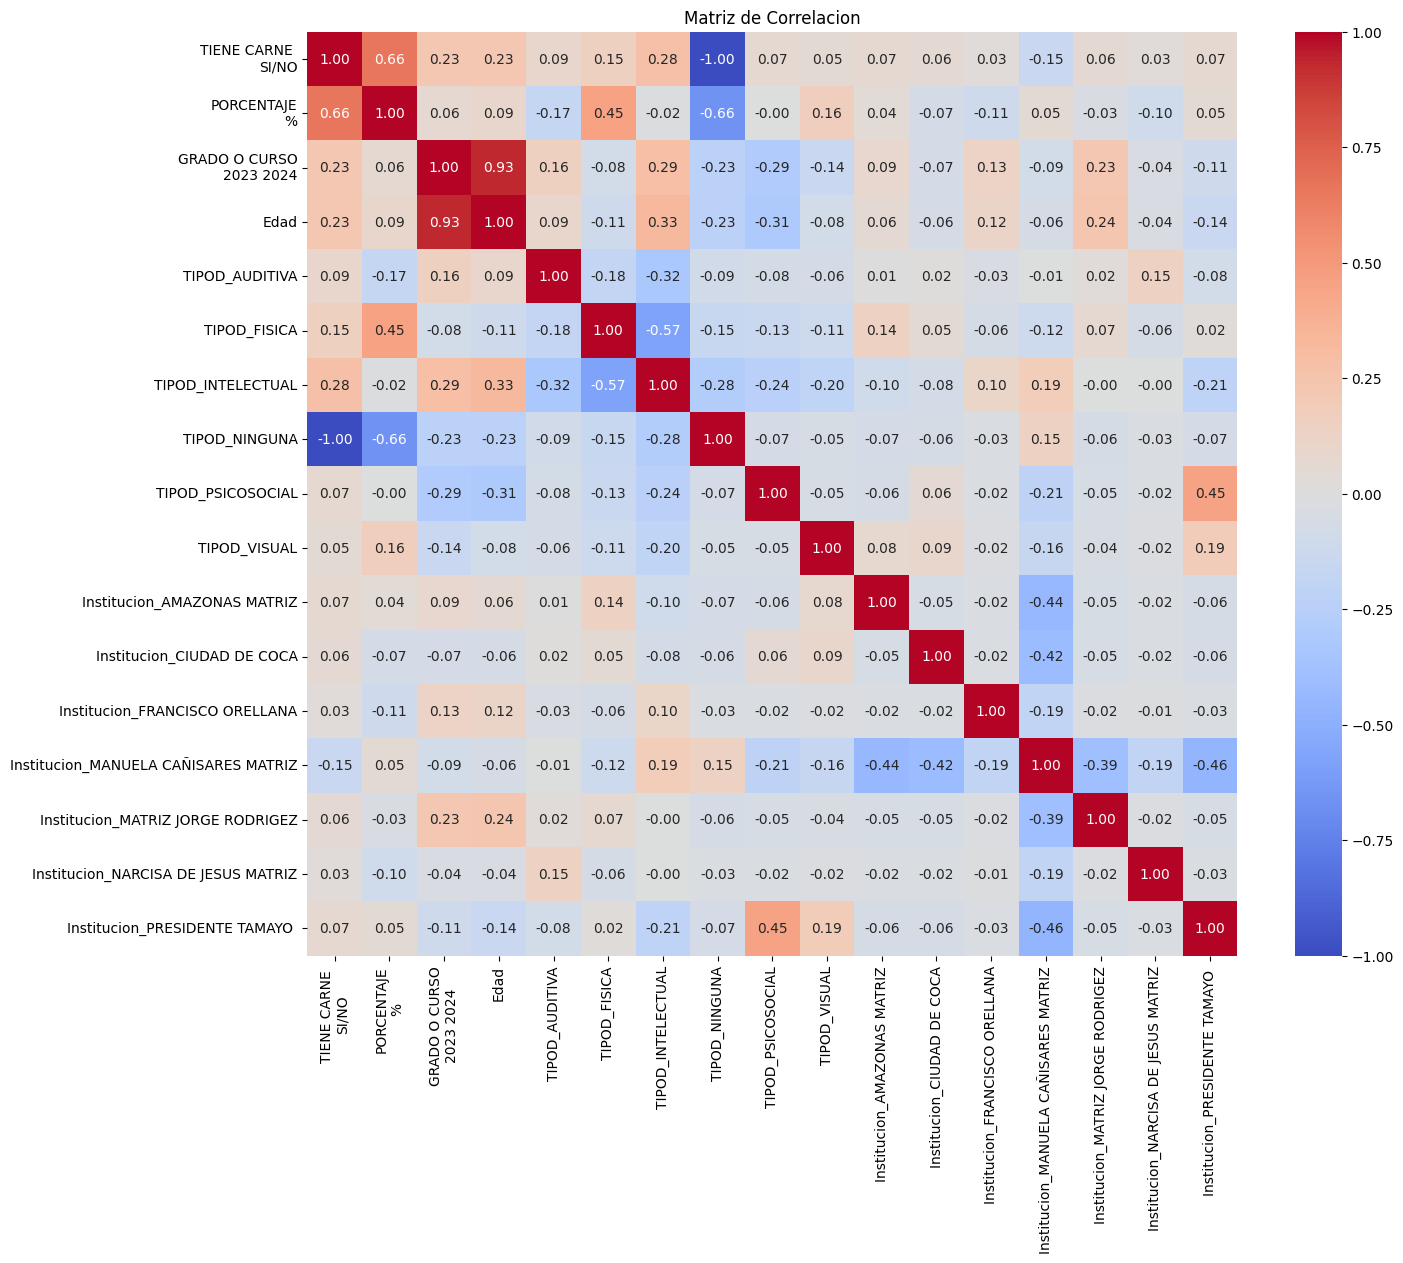

In [63]:
cov_matrix = df_new.corr()
# Crear el mapa de calor
plt.figure(figsize=(15, 12))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlacion')
plt.show(block=True)

Se eliminia el curso ya que tiene alta correlacion y si tiene carnet o no

In [64]:

df_new=df_new.drop(['Edad','TIENE CARNE \nSI/NO'], axis=1) 

In [65]:
df_new.dtypes

PORCENTAJE\n%                           float64
GRADO O CURSO\n2023 2024                  int64
TIPOD_AUDITIVA                            int32
TIPOD_FISICA                              int32
TIPOD_INTELECTUAL                         int32
TIPOD_NINGUNA                             int32
TIPOD_PSICOSOCIAL                         int32
TIPOD_VISUAL                              int32
Institucion_AMAZONAS MATRIZ               int32
Institucion_CIUDAD DE COCA                int32
Institucion_FRANCISCO ORELLANA            int32
Institucion_MANUELA CAÑISARES MATRIZ      int32
Institucion_MATRIZ JORGE RODRIGEZ         int32
Institucion_NARCISA DE JESUS MATRIZ       int32
Institucion_PRESIDENTE TAMAYO             int32
dtype: object

## Normalizar

In [66]:
# Normalizar los datos


from sklearn import preprocessing

credit_data_z = pd.DataFrame(preprocessing.scale(df_new), 
                             columns = df_new.columns)
#scaler = StandardScaler()
#df_scaled= scaler.fit_transform(df_new)


In [67]:
credit_data_z.describe()

,PORCENTAJE\n%,GRADO O CURSO\n2023 2024,TIPOD_AUDITIVA,TIPOD_FISICA,TIPOD_INTELECTUAL,TIPOD_NINGUNA,TIPOD_PSICOSOCIAL,TIPOD_VISUAL,Institucion_AMAZONAS MATRIZ,Institucion_CIUDAD DE COCA,Institucion_FRANCISCO ORELLANA,Institucion_MANUELA CAÑISARES MATRIZ,Institucion_MATRIZ JORGE RODRIGEZ,Institucion_NARCISA DE JESUS MATRIZ,Institucion_PRESIDENTE TAMAYO
count,1.860000e+02,186.000000,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02
mean,-1.719055e-16,0.000000,-2.865092e-17,-1.074409e-17,-6.685214e-17,3.820122e-17,-6.685214e-17,-1.193788e-17,-5.730183e-17,1.910061e-17,9.550306e-18,3.820122e-17,-1.910061e-17,9.550306e-18,-9.550306e-17
std,1.002699e+00,1.002699,1.002699e+00,1.002699e+00,1.002699e+00,1.002699e+00,1.002699e+00,1.002699e+00,1.002699e+00,1.002699e+00,1.002699e+00,1.002699e+00,1.002699e+00,1.002699e+00,1.002699e+00
min,-2.409170e+00,-2.266404,-3.171620e-01,-5.649327e-01,-1.010811e+00,-2.741250e-01,-2.383656e-01,-1.977527e-01,-2.383656e-01,-2.254938e-01,-1.042572e-01,-1.851640e+00,-2.119996e-01,-1.042572e-01,-2.507133e-01
25%,-5.612581e-01,-0.912675,-3.171620e-01,-5.649327e-01,-1.010811e+00,-2.741250e-01,-2.383656e-01,-1.977527e-01,-2.383656e-01,-2.254938e-01,-1.042572e-01,5.400617e-01,-2.119996e-01,-1.042572e-01,-2.507133e-01
50%,-9.928005e-02,0.170308,-3.171620e-01,-5.649327e-01,9.893045e-01,-2.741250e-01,-2.383656e-01,-1.977527e-01,-2.383656e-01,-2.254938e-01,-1.042572e-01,5.400617e-01,-2.119996e-01,-1.042572e-01,-2.507133e-01
75%,8.316056e-01,0.711799,-3.171620e-01,-5.649327e-01,9.893045e-01,-2.741250e-01,-2.383656e-01,-1.977527e-01,-2.383656e-01,-2.254938e-01,-1.042572e-01,5.400617e-01,-2.119996e-01,-1.042572e-01,-2.507133e-01
max,1.979621e+00,1.253291,3.152963e+00,1.770122e+00,9.893045e-01,3.647971e+00,4.195235e+00,5.056820e+00,4.195235e+00,4.434712e+00,9.591663e+00,5.400617e-01,4.716991e+00,9.591663e+00,3.988620e+00


## Clusterizacion utilizando kmeans

In [68]:
wss = (credit_data_z.shape[0]-1)*np.sum(credit_data_z.apply(np.var, axis=0))
wss

2775.0

In [69]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [70]:
K = range(1, 15)

In [71]:
kMeans = [KMeans(n_clusters=k, random_state=1234).fit(credit_data_z.values) for k in K]
kMeans_centroids = [iteration.cluster_centers_ for iteration in kMeans]
#kMeans_centroids

In [72]:
# For example, we may access specific co-ordinates of centroids for each cluster
# within a 3-cluster arrangement of the data:
kMeans_centroids[2].shape # each row of the array represents co-ordinates of a centroid

(3, 15)

In [73]:
kMeans_centroids[2][0,:] # c

array([ 0.67610971, -0.37118376, -0.31716197,  1.10296381, -0.97906326,
       -0.27412499,  0.46538055,  0.38608868,  0.18388207,  0.14436376,
       -0.10425721, -0.40902634,  0.02271424, -0.10425721,  0.48948781])

In [74]:
k_dist = [cdist(credit_data_z.values, centroids, metric='euclidean') for centroids in kMeans_centroids]
#k_dist[2] # each value represents summed Euclidean distances from a specific data point to a centroid

In [75]:
k_dist[2].shape

(186, 3)

In [76]:
min_dist = [np.min(distance, axis=1) for distance in k_dist]
min_dist[2][:10] # the first 10 shortest distances for the 3-cluster assignment

array([2.54415707, 2.54415707, 5.02941356, 2.28949627, 2.53932644,
       4.70381713, 4.9055131 , 2.2812886 , 5.38219662, 2.25338114])

In [77]:
wcss = np.array([sum(d**2) for d in min_dist])
wcss

array([2790.        , 2563.98253116, 2195.45973264, 1997.72695921,
       1753.17543448, 1550.86500905, 1251.54271489, 1056.89189911,
        863.63434421,  678.99028676,  518.88429825,  466.16264653,
        378.52674484,  374.64910341])

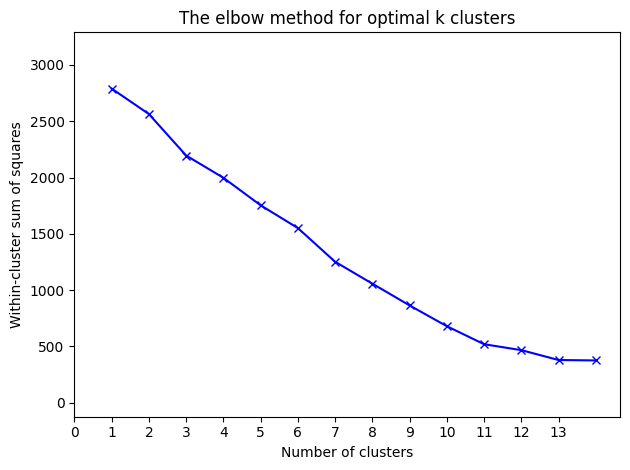

In [78]:
# The drop of the within clusters sums of squares can be plotted:
plt.plot(K, wcss, 'bx-')
plt.xlabel("Number of clusters")
plt.xticks(range(0,14))
plt.ylabel("Within-cluster sum of squares")
plt.ylim(wcss.min()-500, wcss.max()+500)
plt.title("The elbow method for optimal k clusters")
plt.tight_layout()

In [79]:
# 8. In k-means clustering our objective is to minimise total within-cluster sum of squares
# and maximise between clusters sum of squares.
# Setting multiple initial random assignments may improve the clustering. 

means2 = (KMeans(n_clusters=7, random_state=1234, 
                 init='k-means++', n_init=100)
            .fit(credit_data_z.values))
means2

KMeans(n_clusters=7, n_init=100, random_state=1234)

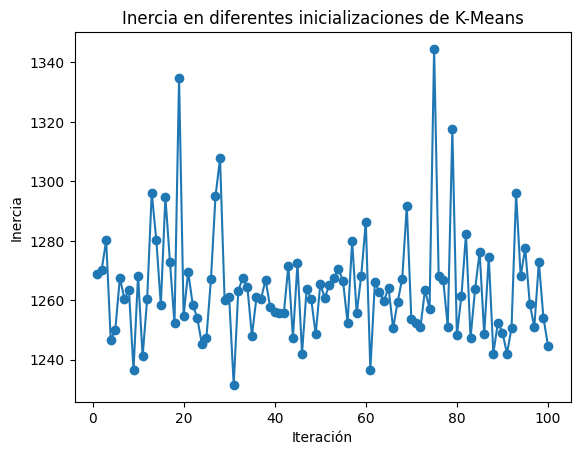

In [80]:
# graficar inercias dependiedno el numero de ejecuciones

inercias = []

for i in range(100):
    modelo = KMeans(n_clusters=7, init='random', random_state=i)
    modelo.fit(credit_data_z.values)
    inercias.append(modelo.inertia_)

plt.plot(range(1, 101), inercias, marker='o')
plt.xlabel('Iteración')
plt.ylabel('Inercia')
plt.title('Inercia en diferentes inicializaciones de K-Means')
plt.show()

In [81]:
# Calculating within clusters sum of squares for the 'means2' cluster assignment:
wcss_means2 = sum(np.min(cdist(credit_data_z.values, means2.cluster_centers_), axis=1)**2)
wcss_means2 #2309.3 (vs 2310.3 previously)

# n_init=50 did not change much in this case. 
# Setting 'n_init' to higher values e.g. 100 or 150 may help, but then the 'max_iter' argument 
# has to be adjusted to allow more iterations and convergence of the algorithm. 
# In this case, it is more recommended to use a faster method with just n_init=1.
# Remember that the higher 'n_init' and 'max_iter', 
# the longer time spent on algorithm computation.

1235.2221981207913

## PCA

In [82]:
# First, create a copy of the z-score standardised data and add
# a new variable 'cluster' with labels of the cluster assignment:
credit_data_z_copy = credit_data_z.copy()
credit_data_z_copy['cluster'] = pd.Series(means2.labels_, index = credit_data_z.index)

In [83]:
credit_data_z_copy.iloc[:,:15]

,PORCENTAJE\n%,GRADO O CURSO\n2023 2024,TIPOD_AUDITIVA,TIPOD_FISICA,TIPOD_INTELECTUAL,TIPOD_NINGUNA,TIPOD_PSICOSOCIAL,TIPOD_VISUAL,Institucion_AMAZONAS MATRIZ,Institucion_CIUDAD DE COCA,Institucion_FRANCISCO ORELLANA,Institucion_MANUELA CAÑISARES MATRIZ,Institucion_MATRIZ JORGE RODRIGEZ,Institucion_NARCISA DE JESUS MATRIZ,Institucion_PRESIDENTE TAMAYO
0,-0.746049,-2.266404,-0.317162,-0.564933,0.989305,-0.274125,-0.238366,-0.197753,-0.238366,-0.225494,-0.104257,0.540062,-0.212,-0.104257,-0.250713
1,-0.746049,-2.266404,-0.317162,-0.564933,0.989305,-0.274125,-0.238366,-0.197753,-0.238366,-0.225494,-0.104257,0.540062,-0.212,-0.104257,-0.250713
2,-2.409170,-2.266404,-0.317162,-0.564933,-1.010811,3.647971,-0.238366,-0.197753,-0.238366,-0.225494,-0.104257,0.540062,-0.212,-0.104257,-0.250713
3,-0.746049,-1.995659,-0.317162,-0.564933,0.989305,-0.274125,-0.238366,-0.197753,-0.238366,-0.225494,-0.104257,0.540062,-0.212,-0.104257,-0.250713
4,1.517643,-1.995659,-0.317162,1.770122,-1.010811,-0.274125,-0.238366,-0.197753,-0.238366,-0.225494,-0.104257,0.540062,-0.212,-0.104257,-0.250713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,-0.792247,0.441054,-0.317162,-0.564933,0.989305,-0.274125,-0.238366,-0.197753,-0.238366,4.434712,-0.104257,-1.851640,-0.212,-0.104257,-0.250713
182,-0.330269,1.253291,-0.317162,-0.564933,0.989305,-0.274125,-0.238366,-0.197753,-0.238366,4.434712,-0.104257,-1.851640,-0.212,-0.104257,-0.250713
183,0.270302,-1.724913,-0.317162,-0.564933,-1.010811,-0.274125,-0.238366,5.056820,-0.238366,4.434712,-0.104257,-1.851640,-0.212,-0.104257,-0.250713
184,-1.023236,0.711799,-0.317162,1.770122,-1.010811,-0.274125,-0.238366,-0.197753,-0.238366,4.434712,-0.104257,-1.851640,-0.212,-0.104257,-0.250713


In [84]:
from sklearn.decomposition import PCA
pca_means2 = PCA(n_components=2).fit(credit_data_z_copy.iloc[:,:15])
pca_2d_means2 = pca_means2.transform(credit_data_z_copy.iloc[:,:15])
pca_2d_means2.shape

(186, 2)

In [85]:
sum(pca_means2.explained_variance_ratio_) 

0.280645658857927

In [86]:
df_2=pd.DataFrame({'pca1':pca_2d_means2[:,0],'pca2':pca_2d_means2[:,1],'cluster':credit_data_z_copy['cluster']})

In [87]:
df_2

,pca1,pca2,cluster
0,0.945246,0.881511,2
1,0.945246,0.881511,2
2,1.175312,4.425102,1
3,0.986637,0.778449,2
4,-1.117542,-0.438409,0
...,...,...,...
181,-0.707537,0.181340,2
182,-0.688452,-0.370982,2
183,-3.271939,1.137860,3
184,-2.202832,0.174346,0


<Axes: >

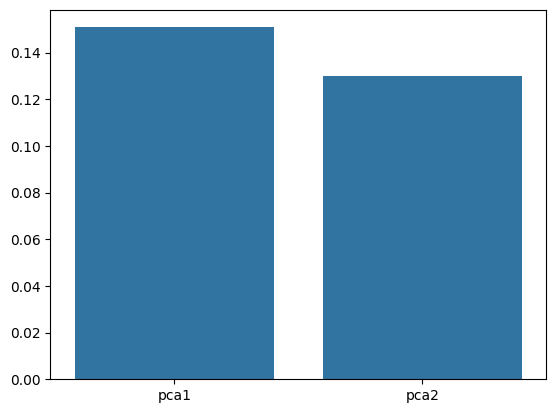

In [88]:
sns.barplot(x=['pca1','pca2'],y=pca_means2.explained_variance_ratio_)

In [89]:
credit_data_z_copy.cluster.unique()

array([2, 1, 0, 6, 3, 5, 4])

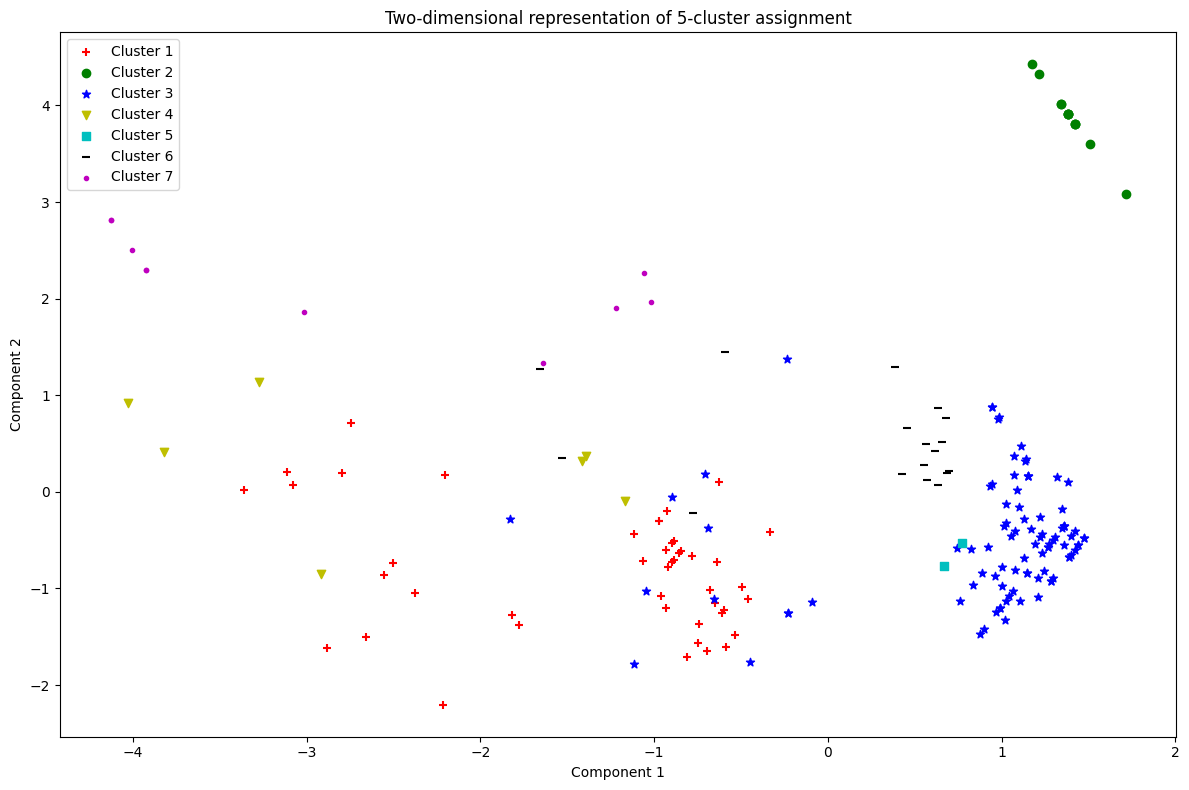

In [90]:
import pylab as pl
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

for i in range(0, pca_2d_means2.shape[0]):
    if credit_data_z_copy.cluster[i] == 0:
        c1 = pl.scatter(pca_2d_means2[i,0], pca_2d_means2[i,1], c='r', marker='+')
    elif credit_data_z_copy.cluster[i] == 1:
        c2 = pl.scatter(pca_2d_means2[i,0], pca_2d_means2[i,1], c='g', marker='o')
    elif credit_data_z_copy.cluster[i] == 2: 
        c3 = pl.scatter(pca_2d_means2[i,0], pca_2d_means2[i,1], c='b', marker='*')
    elif credit_data_z_copy.cluster[i] == 3: 
        c4 = pl.scatter(pca_2d_means2[i,0], pca_2d_means2[i,1], c='y', marker='v')
    elif credit_data_z_copy.cluster[i] == 4: 
        c5 = pl.scatter(pca_2d_means2[i,0], pca_2d_means2[i,1], c='c', marker='s') 
    elif credit_data_z_copy.cluster[i] == 5: 
        c6 = pl.scatter(pca_2d_means2[i,0], pca_2d_means2[i,1], c='k', marker='_') 
    elif credit_data_z_copy.cluster[i] == 6: 
        c7 = pl.scatter(pca_2d_means2[i,0], pca_2d_means2[i,1], c='m', marker='.') 
        
pl.legend([c1, c2, c3, c4, c5,c6,c7], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5','Cluster 6','Cluster 7'])
pl.title('Two-dimensional representation of 5-cluster assignment')
pl.xlabel('Component 1')
pl.ylabel('Component 2')
pl.tight_layout()

In [91]:
pca_means2_3d = PCA(n_components=3).fit(credit_data_z_copy.iloc[:,:6])
pca_3d_means2 = pca_means2_3d.transform(credit_data_z_copy.iloc[:,:6])
pca_3d_means2.shape

(186, 3)

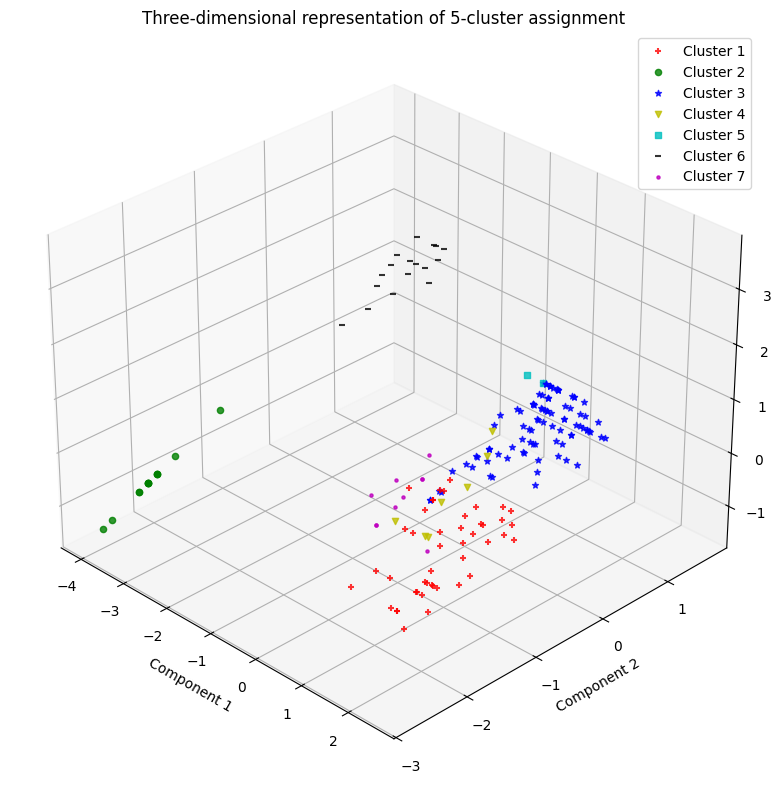

In [92]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

for i in range(0, pca_3d_means2.shape[0]):
    if credit_data_z_copy.cluster[i] == 0:
        c1 = ax.scatter(pca_3d_means2[i,0], pca_3d_means2[i,1], pca_3d_means2[i,2], color='r', marker='+', alpha = 0.8)
    elif credit_data_z_copy.cluster[i] == 1:
        c2 = ax.scatter(pca_3d_means2[i,0], pca_3d_means2[i,1], pca_3d_means2[i,2], color='g', marker='o', alpha = 0.8)
    elif credit_data_z_copy.cluster[i] == 2: 
        c3 = ax.scatter(pca_3d_means2[i,0], pca_3d_means2[i,1], pca_3d_means2[i,2], color='b', marker='*', alpha = 0.8)
    elif credit_data_z_copy.cluster[i] == 3: 
        c4 = ax.scatter(pca_3d_means2[i,0], pca_3d_means2[i,1], pca_3d_means2[i,2], color='y', marker='v', alpha = 0.8)
    elif credit_data_z_copy.cluster[i] == 4: 
        c5 = ax.scatter(pca_3d_means2[i,0], pca_3d_means2[i,1], pca_3d_means2[i,2], color='c', marker='s', alpha = 0.8) 
    elif credit_data_z_copy.cluster[i] == 5: 
        c6 = ax.scatter(pca_3d_means2[i,0], pca_3d_means2[i,1], pca_3d_means2[i,2], color='k', marker='_', alpha = 0.8) 
    elif credit_data_z_copy.cluster[i] == 6: 
        c7 = ax.scatter(pca_3d_means2[i,0], pca_3d_means2[i,1], pca_3d_means2[i,2], color='m', marker='.', alpha = 0.8) 
plt.legend([c1, c2, c3, c4, c5,c6,c7], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5','Cluster 6','Cluster 7'])
ax.set_title('Three-dimensional representation of 5-cluster assignment')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
for i in range(0, 360, 45):
    ax.view_init(None, i)
    plt.tight_layout()


In [93]:
df_or['cluster'] = pd.Series(means2.labels_, index = df.index)

In [95]:
df_or.to_csv('datos_clusterizados.csv', index=False)